In [1]:
# Import all the libraries:

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, least_squares
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date

In [2]:
# Wells dataset
# well_D18 = pd.read_csv('C:/Users/renan/Documents/RENAN/Noruega/UIS/Thesis/Equinor data/Johan Sverdrup DP/NO162D18-2.csv',sep=';')
#well_D6 = pd.read_csv('C:/Users/renan/Documents/RENAN/Noruega/UIS/Thesis/Equinor data/Johan Sverdrup DP/NO162D6-4.csv',sep=';')
well_D20 = pd.read_csv('C:/Users/renan/Documents/RENAN/Noruega/UIS/Thesis/Equinor data/Johan Sverdrup DP/NO162D20-6.csv',sep=';')
#well_D23 = pd.read_csv('C:/Users/renan/Documents/RENAN/Noruega/UIS/Thesis/Equinor data/Johan Sverdrup DP/NO162D23-3.csv',sep=';')
#well_D41 = pd.read_csv('C:/Users/renan/Documents/RENAN/Noruega/UIS/Thesis/Equinor data/Johan Sverdrup DP/NO162D41-5.csv',sep=';')
#well_D42 = pd.read_csv('C:/Users/renan/Documents/RENAN/Noruega/UIS/Thesis/Equinor data/Johan Sverdrup DP/NO162D42-1.csv',sep=';')

df = well_D20
print('shape:', df.shape)

df

C:\Users\renan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


shape: (702014, 16)


depthBit depthBit.1             depthHole depthHole.1  \
0                      INDEX      VALUE                 INDEX       VALUE   
1                       time          m                  time           m   
2       2020-04-15T00:00:00Z  34.606612  2020-04-15T00:00:00Z       318.0   
3       2020-04-15T00:00:01Z    34.6066  2020-04-15T00:00:01Z       318.0   
4       2020-04-15T00:00:04Z    34.6066  2020-04-15T00:00:04Z       318.0   
...                      ...        ...                   ...         ...   
702009                   NaN        NaN  2020-05-01T20:37:56Z     2117.11   
702010                   NaN        NaN  2020-05-01T20:37:58Z     2117.11   
702011                   NaN        NaN  2020-05-01T20:38:00Z     2117.11   
702012                   NaN        NaN  2020-05-01T20:38:01Z     2117.11   
702013                   NaN        NaN  2020-05-01T20:38:04Z     2117.11   

                         rpm  rpm.1                torque torque.1  \
0                      INDEX  VALUE                 INDEX    VALUE   
1                       time  rev/s                  time      N.m   
2       2020-04-15T00:00:01Z    0.0  2020-04-15T00:00:01Z      0.0   
3       2020-04-15T00:00:04Z    0.0  2020-04-15T00:00:04Z      0.0   
4       2020-04-15T00:00:06Z    0.0  2020-04-15T00:00:06Z      0.0   
...                      ...    ...                   ...      ...   
702009                   NaN    NaN                   NaN      NaN   
702010                   NaN    NaN                   NaN      NaN   
702011                   NaN    NaN                   NaN      NaN   
702012                   NaN    NaN                   NaN      NaN   
702013                   NaN    NaN                   NaN      NaN   

                 weightOnBit weightOnBit.1                velRop velRop.1  \
0                      INDEX         VALUE                 INDEX    VALUE   
1                       time             N                  time      m/s   
2       2020-04-15T00:00:01Z       88264.4  2020-04-15T00:00:01Z      0.0   
3       2020-04-15T00:00:04Z       88232.9  2020-04-15T00:00:04Z      0.0   
4       2020-04-15T00:00:06Z       88246.0  2020-04-15T00:00:06Z      0.0   
...                      ...           ...                   ...      ...   
702009                   NaN           NaN                   NaN      NaN   
702010                   NaN           NaN                   NaN      NaN   
702011                   NaN           NaN                   NaN      NaN   
702012                   NaN           NaN                   NaN      NaN   
702013                   NaN           NaN                   NaN      NaN   

                      flowIn flowIn.1     standpipePressure  \
0                      INDEX    VALUE                 INDEX   
1                       time     m3/s                  time   
2       2020-04-15T00:00:01Z      0.0  2020-04-15T00:00:01Z   
3       2020-04-15T00:00:04Z      0.0  2020-04-15T00:00:04Z   
4       2020-04-15T00:00:06Z      0.0  2020-04-15T00:00:06Z   
...                      ...      ...                   ...   
702009                   NaN      NaN                   NaN   
702010                   NaN      NaN                   NaN   
702011                   NaN      NaN                   NaN   
702012                   NaN      NaN                   NaN   
702013                   NaN      NaN                   NaN   

       standpipePressure.1  
0                    VALUE  
1                       Pa  
2                 106772.0  
3                 106624.0  
4                 106670.0  
...                    ...  
702009                 NaN  
702010                 NaN  
702011                 NaN  
702012                 NaN  
702013                 NaN  

[702014 rows x 16 columns]

In [3]:
df.columns = ['time_DB','Depth Bit[m]','time_DH','Depth Hole[m]','time_RPM','RPM[rev/s]','time_TOR','Torque[N.m]',
              'time_WOB','WOB[N]', 'time_ROP','ROP[m/s]','time_FR','Flow rate[m3/s]','time_SPP','Stand Pipe Pressure[Pa]' ]
df

time_DB Depth Bit[m]               time_DH Depth Hole[m]  \
0                      INDEX        VALUE                 INDEX         VALUE   
1                       time            m                  time             m   
2       2020-04-15T00:00:00Z    34.606612  2020-04-15T00:00:00Z         318.0   
3       2020-04-15T00:00:01Z      34.6066  2020-04-15T00:00:01Z         318.0   
4       2020-04-15T00:00:04Z      34.6066  2020-04-15T00:00:04Z         318.0   
...                      ...          ...                   ...           ...   
702009                   NaN          NaN  2020-05-01T20:37:56Z       2117.11   
702010                   NaN          NaN  2020-05-01T20:37:58Z       2117.11   
702011                   NaN          NaN  2020-05-01T20:38:00Z       2117.11   
702012                   NaN          NaN  2020-05-01T20:38:01Z       2117.11   
702013                   NaN          NaN  2020-05-01T20:38:04Z       2117.11   

                    time_RPM RPM[rev/s]              time_TOR Torque[N.m]  \
0                      INDEX      VALUE                 INDEX       VALUE   
1                       time      rev/s                  time         N.m   
2       2020-04-15T00:00:01Z        0.0  2020-04-15T00:00:01Z         0.0   
3       2020-04-15T00:00:04Z        0.0  2020-04-15T00:00:04Z         0.0   
4       2020-04-15T00:00:06Z        0.0  2020-04-15T00:00:06Z         0.0   
...                      ...        ...                   ...         ...   
702009                   NaN        NaN                   NaN         NaN   
702010                   NaN        NaN                   NaN         NaN   
702011                   NaN        NaN                   NaN         NaN   
702012                   NaN        NaN                   NaN         NaN   
702013                   NaN        NaN                   NaN         NaN   

                    time_WOB   WOB[N]              time_ROP ROP[m/s]  \
0                      INDEX    VALUE                 INDEX    VALUE   
1                       time        N                  time      m/s   
2       2020-04-15T00:00:01Z  88264.4  2020-04-15T00:00:01Z      0.0   
3       2020-04-15T00:00:04Z  88232.9  2020-04-15T00:00:04Z      0.0   
4       2020-04-15T00:00:06Z  88246.0  2020-04-15T00:00:06Z      0.0   
...                      ...      ...                   ...      ...   
702009                   NaN      NaN                   NaN      NaN   
702010                   NaN      NaN                   NaN      NaN   
702011                   NaN      NaN                   NaN      NaN   
702012                   NaN      NaN                   NaN      NaN   
702013                   NaN      NaN                   NaN      NaN   

                     time_FR Flow rate[m3/s]              time_SPP  \
0                      INDEX           VALUE                 INDEX   
1                       time            m3/s                  time   
2       2020-04-15T00:00:01Z             0.0  2020-04-15T00:00:01Z   
3       2020-04-15T00:00:04Z             0.0  2020-04-15T00:00:04Z   
4       2020-04-15T00:00:06Z             0.0  2020-04-15T00:00:06Z   
...                      ...             ...                   ...   
702009                   NaN             NaN                   NaN   
702010                   NaN             NaN                   NaN   
702011                   NaN             NaN                   NaN   
702012                   NaN             NaN                   NaN   
702013                   NaN             NaN                   NaN   

       Stand Pipe Pressure[Pa]  
0                        VALUE  
1                           Pa  
2                     106772.0  
3                     106624.0  
4                     106670.0  
...                        ...  
702009                     NaN  
702010                     NaN  
702011                     NaN  
702012                     NaN  
702013                     NaN  

[702014 rows x 16 co

In [4]:
df = df.drop(df.index[[0,1]])
df.index = list(range(df.shape[0]))
df

time_DB Depth Bit[m]               time_DH Depth Hole[m]  \
0       2020-04-15T00:00:00Z    34.606612  2020-04-15T00:00:00Z         318.0   
1       2020-04-15T00:00:01Z      34.6066  2020-04-15T00:00:01Z         318.0   
2       2020-04-15T00:00:04Z      34.6066  2020-04-15T00:00:04Z         318.0   
3       2020-04-15T00:00:06Z      34.6066  2020-04-15T00:00:05Z         318.0   
4       2020-04-15T00:00:09Z      34.6066  2020-04-15T00:00:06Z         318.0   
...                      ...          ...                   ...           ...   
702007                   NaN          NaN  2020-05-01T20:37:56Z       2117.11   
702008                   NaN          NaN  2020-05-01T20:37:58Z       2117.11   
702009                   NaN          NaN  2020-05-01T20:38:00Z       2117.11   
702010                   NaN          NaN  2020-05-01T20:38:01Z       2117.11   
702011                   NaN          NaN  2020-05-01T20:38:04Z       2117.11   

                    time_RPM RPM[rev/s]              time_TOR Torque[N.m]  \
0       2020-04-15T00:00:01Z        0.0  2020-04-15T00:00:01Z         0.0   
1       2020-04-15T00:00:04Z        0.0  2020-04-15T00:00:04Z         0.0   
2       2020-04-15T00:00:06Z        0.0  2020-04-15T00:00:06Z         0.0   
3       2020-04-15T00:00:09Z        0.0  2020-04-15T00:00:09Z         0.0   
4       2020-04-15T00:00:12Z        0.0  2020-04-15T00:00:12Z         0.0   
...                      ...        ...                   ...         ...   
702007                   NaN        NaN                   NaN         NaN   
702008                   NaN        NaN                   NaN         NaN   
702009                   NaN        NaN                   NaN         NaN   
702010                   NaN        NaN                   NaN         NaN   
702011                   NaN        NaN                   NaN         NaN   

                    time_WOB   WOB[N]              time_ROP ROP[m/s]  \
0       2020-04-15T00:00:01Z  88264.4  2020-04-15T00:00:01Z      0.0   
1       2020-04-15T00:00:04Z  88232.9  2020-04-15T00:00:04Z      0.0   
2       2020-04-15T00:00:06Z  88246.0  2020-04-15T00:00:06Z      0.0   
3       2020-04-15T00:00:09Z  87984.6  2020-04-15T00:00:09Z      0.0   
4       2020-04-15T00:00:12Z  87693.6  2020-04-15T00:00:12Z      0.0   
...                      ...      ...                   ...      ...   
702007                   NaN      NaN                   NaN      NaN   
702008                   NaN      NaN                   NaN      NaN   
702009                   NaN      NaN                   NaN      NaN   
702010                   NaN      NaN                   NaN      NaN   
702011                   NaN      NaN                   NaN      NaN   

                     time_FR Flow rate[m3/s]              time_SPP  \
0       2020-04-15T00:00:01Z             0.0  2020-04-15T00:00:01Z   
1       2020-04-15T00:00:04Z             0.0  2020-04-15T00:00:04Z   
2       2020-04-15T00:00:06Z             0.0  2020-04-15T00:00:06Z   
3       2020-04-15T00:00:09Z             0.0  2020-04-15T00:00:09Z   
4       2020-04-15T00:00:12Z             0.0  2020-04-15T00:00:12Z   
...                      ...             ...                   ...   
702007                   NaN             NaN                   NaN   
702008                   NaN             NaN                   NaN   
702009                   NaN             NaN                   NaN   
702010                   NaN             NaN                   NaN   
702011                   NaN             NaN                   NaN   

       Stand Pipe Pressure[Pa]  
0                     106772.0  
1                     106624.0  
2                     106670.0  
3                     106671.0  
4                     106702.0  
...                        ...  
702007                     NaN  
702008                     NaN  
702009                     NaN  
702010                     NaN  
702011                     NaN  

[702012 rows x 16 co

In [5]:
df.dtypes

time_DB                    object
Depth Bit[m]               object
time_DH                    object
Depth Hole[m]              object
time_RPM                   object
RPM[rev/s]                 object
time_TOR                   object
Torque[N.m]                object
time_WOB                   object
WOB[N]                     object
time_ROP                   object
ROP[m/s]                   object
time_FR                    object
Flow rate[m3/s]            object
time_SPP                   object
Stand Pipe Pressure[Pa]    object
dtype: object

In [6]:
# Convert in datetime and to numeric

df['time_DB'] = pd.to_datetime(df['time_DB'])
df['time_DH'] = pd.to_datetime(df['time_DH'])
df['time_RPM'] = pd.to_datetime(df['time_RPM'])
df['time_TOR'] = pd.to_datetime(df['time_TOR'])
df['time_WOB'] = pd.to_datetime(df['time_WOB'])
df['time_ROP'] = pd.to_datetime(df['time_ROP'])
df['time_FR'] = pd.to_datetime(df['time_FR'])
df['time_SPP'] = pd.to_datetime(df['time_SPP'])

df['Depth Bit[m]'] = pd.to_numeric(df['Depth Bit[m]'])
df['Depth Hole[m]'] = pd.to_numeric(df['Depth Hole[m]'])
df['RPM[rev/s]'] = pd.to_numeric(df['RPM[rev/s]'])
df['Torque[N.m]'] = pd.to_numeric(df['Torque[N.m]'])
df['WOB[N]'] = pd.to_numeric(df['WOB[N]'])
df['ROP[m/s]'] = pd.to_numeric(df['ROP[m/s]'])
df['Flow rate[m3/s]'] = pd.to_numeric(df['Flow rate[m3/s]'])
df['Stand Pipe Pressure[Pa]'] = pd.to_numeric(df['Stand Pipe Pressure[Pa]'])

df.dtypes

time_DB                    datetime64[ns, UTC]
Depth Bit[m]                           float64
time_DH                    datetime64[ns, UTC]
Depth Hole[m]                          float64
time_RPM                   datetime64[ns, UTC]
RPM[rev/s]                             float64
time_TOR                   datetime64[ns, UTC]
Torque[N.m]                            float64
time_WOB                   datetime64[ns, UTC]
WOB[N]                                 float64
time_ROP                   datetime64[ns, UTC]
ROP[m/s]                               float64
time_FR                    datetime64[ns, UTC]
Flow rate[m3/s]                        float64
time_SPP                   datetime64[ns, UTC]
Stand Pipe Pressure[Pa]                float64
dtype: object

In [7]:
# Create dataframe for each parameter:
df_DB = pd.concat([df['time_DB'] , df['Depth Bit[m]'] ], join = 'outer', axis = 1) 
df_DH = pd.concat([df['time_DH'] , df['Depth Hole[m]'] ], join = 'outer', axis = 1)
df_RPM = pd.concat([df['time_RPM'] , df['RPM[rev/s]'] ], join = 'outer', axis = 1)
df_TOR = pd.concat([df['time_TOR'] , df['Torque[N.m]'] ], join = 'outer', axis = 1)
df_WOB = pd.concat([df['time_WOB'] , df['WOB[N]'] ], join = 'outer', axis = 1)
df_ROP = pd.concat([df['time_ROP'] , df['ROP[m/s]'] ], join = 'outer', axis = 1)
df_FR = pd.concat([df['time_FR'] , df['Flow rate[m3/s]'] ], join = 'outer', axis = 1)
df_SPP = pd.concat([df['time_SPP'] , df['Stand Pipe Pressure[Pa]'] ], join = 'outer', axis = 1)

df_ROP

time_ROP  ROP[m/s]
0      2020-04-15 00:00:01+00:00       0.0
1      2020-04-15 00:00:04+00:00       0.0
2      2020-04-15 00:00:06+00:00       0.0
3      2020-04-15 00:00:09+00:00       0.0
4      2020-04-15 00:00:12+00:00       0.0
...                          ...       ...
702007                       NaT       NaN
702008                       NaT       NaN
702009                       NaT       NaN
702010                       NaT       NaN
702011                       NaT       NaN

[702012 rows x 2 columns]

In [8]:
# Missing values per column:
df.isnull().sum(axis=0)

time_DB                     47160
Depth Bit[m]                47160
time_DH                         0
Depth Hole[m]                   0
time_RPM                   186746
RPM[rev/s]                 186746
time_TOR                   186732
Torque[N.m]                186732
time_WOB                   186731
WOB[N]                     186731
time_ROP                   186730
ROP[m/s]                   186730
time_FR                    186733
Flow rate[m3/s]            186733
time_SPP                   186734
Stand Pipe Pressure[Pa]    186734
dtype: int64

In [9]:
df.describe()

Depth Bit[m]  Depth Hole[m]     RPM[rev/s]    Torque[N.m]  \
count  654852.000000  702012.000000  515266.000000  515280.000000   
mean      810.272005    1515.936265       0.297091    5129.936236   
std       699.088140     601.485045       0.678052    8725.641160   
min       -17.240400       0.000000       0.000000       0.000000   
25%        13.224800    1216.000000       0.000000       0.000000   
50%       863.813500    1219.232854       0.000000     352.268000   
75%      1228.742500    2117.110000       0.260997    6831.870000   
max      2117.110000    2117.110000       2.873990   66028.900000   

              WOB[N]       ROP[m/s]  Flow rate[m3/s]  Stand Pipe Pressure[Pa]  
count  515281.000000  515282.000000    515279.000000             5.152780e+05  
mean   107912.618036       0.001246         0.022739             4.752364e+06  
std    167796.938954       0.003495         0.032331             7.084807e+06  
min    -89999.500000      -0.020243         0.000000             8.875140e+03  
25%      -977.491000       0.000000         0.000000             4.127170e+05  
50%     49533.600000       0.000000         0.000000             5.887350e+05  
75%    129667.000000       0.000000         0.052097             7.149125e+06  
max    499999.000000       0.030207         0.086314             3.489380e+07

In [10]:
# using Dropna, delete all rows with missing values:
df_DB = df_DB.dropna()
df_DH = df_DH.dropna() 
df_RPM = df_RPM.dropna()
df_TOR = df_TOR.dropna()
df_WOB = df_WOB.dropna()
df_ROP = df_ROP.dropna()
df_FR = df_FR.dropna()
df_SPP = df_SPP.dropna()
df_SPP

time_SPP  Stand Pipe Pressure[Pa]
0      2020-04-15 00:00:01+00:00                 106772.0
1      2020-04-15 00:00:04+00:00                 106624.0
2      2020-04-15 00:00:06+00:00                 106670.0
3      2020-04-15 00:00:09+00:00                 106671.0
4      2020-04-15 00:00:12+00:00                 106702.0
...                          ...                      ...
515273 2020-05-01 20:37:53+00:00                 672140.0
515274 2020-05-01 20:37:56+00:00                 676376.0
515275 2020-05-01 20:37:58+00:00                 675140.0
515276 2020-05-01 20:38:01+00:00                 674475.0
515277 2020-05-01 20:38:04+00:00                 674436.0

[515278 rows x 2 columns]

In [11]:
# Check duplicates:

print('no. of duplicates DB', df_DB.duplicated().sum(axis=0))
print('no. of duplicates DH', df_DB.duplicated().sum(axis=0))
print('no. of duplicates RPM', df_RPM.duplicated().sum(axis=0))
print('no. of duplicates Torque', df_TOR.duplicated().sum(axis=0))
print('no. of duplicates WOB', df_WOB.duplicated().sum(axis=0))
print('no. of duplicates ROP', df_ROP.duplicated().sum(axis=0))
print('no. of duplicates FR', df_FR.duplicated().sum(axis=0))
print('no. of duplicates SPP', df_SPP.duplicated().sum(axis=0))


no. of duplicates DB 0
no. of duplicates DH 0
no. of duplicates RPM 0
no. of duplicates Torque 0
no. of duplicates WOB 0
no. of duplicates ROP 0
no. of duplicates FR 0
no. of duplicates SPP 0


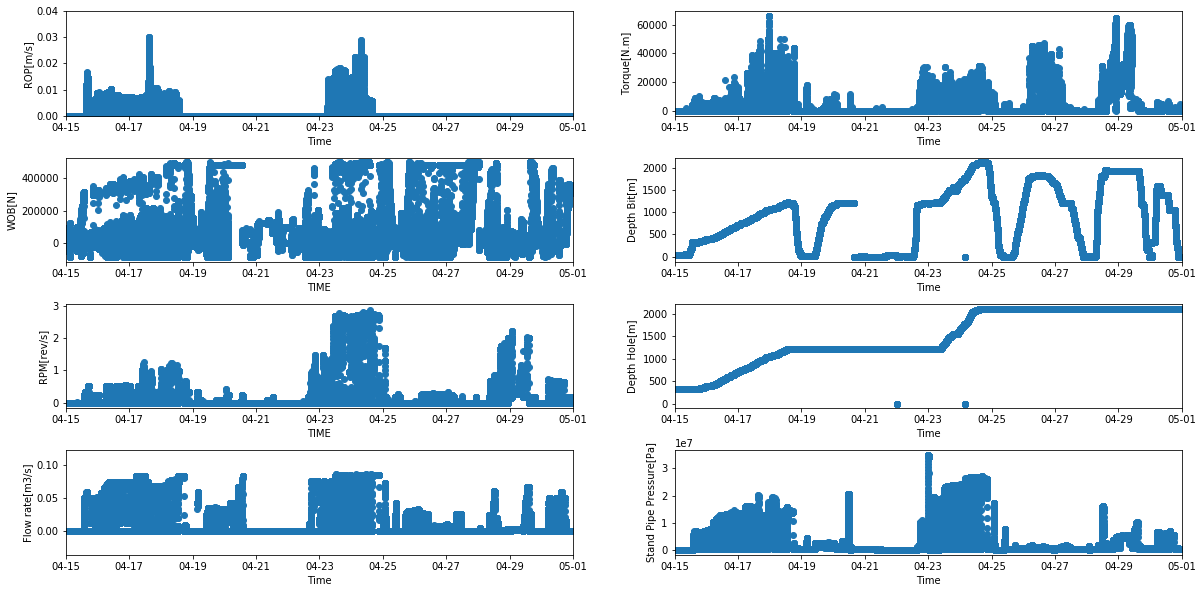

In [17]:
# Plot variables vs time:
date_form = DateFormatter("%m-%d")

fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df_ROP['time_ROP'],df_ROP['ROP[m/s]'])
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))
ROP_t.set_ylim(0,0.04)

WOB_t.scatter(df_WOB['time_WOB'],df_WOB['WOB[N]'] )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

RPM_t.scatter(df_RPM['time_RPM'],df_RPM['RPM[rev/s]'])
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

TOR_t.scatter(df_TOR['time_TOR'],df_TOR['Torque[N.m]'])
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

DB_t.scatter(df_DB['time_DB'],df_DB['Depth Bit[m]'])
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

DH_t.scatter(df_DH['time_DH'],df_DH['Depth Hole[m]'])
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

FR_t.scatter(df_FR['time_FR'],df_FR['Flow rate[m3/s]'])
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

SPP_t.scatter(df_SPP['time_SPP'],df_SPP['Stand Pipe Pressure[Pa]'])
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

plt.show()

In [13]:
# First we change the name of column in all datasets:

df_DB = df_DB.rename(columns={'time_DB':'time'})
df_DH = df_DH.rename(columns={'time_DH':'time'})
df_RPM = df_RPM.rename(columns={'time_RPM':'time'})
df_ROP = df_ROP.rename(columns={'time_ROP':'time'})
df_WOB = df_WOB.rename(columns={'time_WOB':'time'})
df_TOR = df_TOR.rename(columns={'time_TOR':'time'})
df_FR = df_FR.rename(columns={'time_FR':'time'})
df_SPP = df_SPP.rename(columns={'time_SPP':'time'})

# Then we merge the dataframes:

df1 = pd.merge_asof(df_DH,df_DB,on='time', tolerance = pd.Timedelta('0.1s'))
df2 = pd.merge_asof(df_ROP, df_RPM, on='time', tolerance = pd.Timedelta('0.1s'))
df3 = pd.merge_asof(df_WOB, df_TOR, on='time', tolerance = pd.Timedelta('0.1s'))
df4 = pd.merge_asof(df_FR, df_SPP, on='time', tolerance = pd.Timedelta('0.1s'))
df5 = pd.merge_asof(df1, df2, on='time', tolerance = pd.Timedelta('0.1s'))
df6 = pd.merge_asof(df3, df4, on='time', tolerance = pd.Timedelta('0.1s'))
df_merged = pd.merge_asof(df5, df6, on='time', tolerance = pd.Timedelta('0.1s'))

df_merged

time  Depth Hole[m]  Depth Bit[m]  ROP[m/s]  \
0      2020-04-15 00:00:00+00:00         318.00     34.606612       NaN   
1      2020-04-15 00:00:01+00:00         318.00     34.606600       0.0   
2      2020-04-15 00:00:04+00:00         318.00     34.606600       0.0   
3      2020-04-15 00:00:05+00:00         318.00           NaN       NaN   
4      2020-04-15 00:00:06+00:00         318.00     34.606600       0.0   
...                          ...            ...           ...       ...   
702007 2020-05-01 20:37:56+00:00        2117.11    407.753000       0.0   
702008 2020-05-01 20:37:58+00:00        2117.11    407.753000       0.0   
702009 2020-05-01 20:38:00+00:00        2117.11    407.752583       NaN   
702010 2020-05-01 20:38:01+00:00        2117.11    407.753000       0.0   
702011 2020-05-01 20:38:04+00:00        2117.11    407.753000       0.0   

        RPM[rev/s]    WOB[N]  Torque[N.m]  Flow rate[m3/s]  \
0              NaN       NaN          NaN              NaN   
1              0.0   88264.4       0.0000              0.0   
2              0.0   88232.9       0.0000              0.0   
3              NaN       NaN          NaN              NaN   
4              0.0   88246.0       0.0000              0.0   
...            ...       ...          ...              ...   
702007         0.0  194091.0      80.0610              0.0   
702008         0.0  204639.0      85.3984              0.0   
702009         NaN       NaN          NaN              NaN   
702010         0.0  204726.0      90.7358              0.0   
702011         0.0  203367.0     112.0850              0.0   

        Stand Pipe Pressure[Pa]  
0                           NaN  
1                      106772.0  
2                      106624.0  
3                           NaN  
4                      106670.0  
...                         ...  
702007                 676376.0  
702008                 675140.0  
702009                      NaN  
702010                 674475.0  
702011                 674436.0  

[702012 rows x 9 columns]

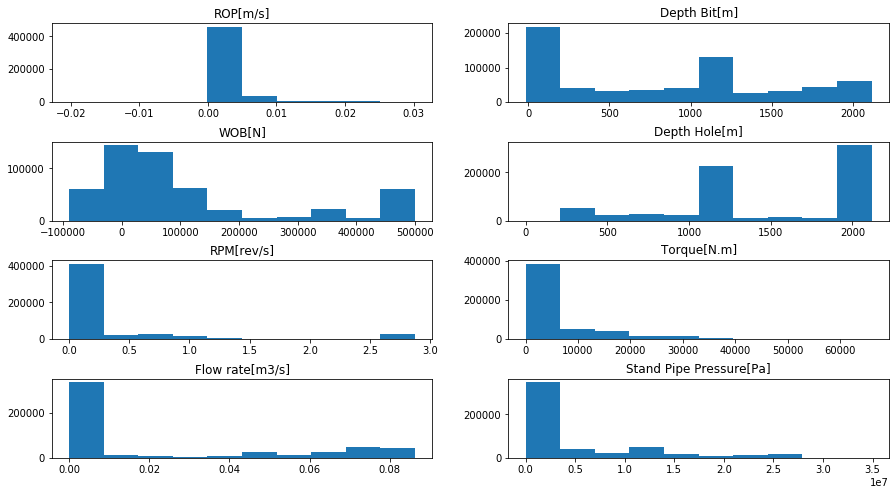

In [14]:
# Print all histograms:
fig2 = plt.figure(figsize=(15, 8))
grid = plt.GridSpec(4, 2, hspace=0.5)
ROP_hist = fig2.add_subplot(grid[0,0])
WOB_hist = fig2.add_subplot(grid[1, 0])
RPM_hist = fig2.add_subplot(grid[2, 0])
DB_hist = fig2.add_subplot(grid[0, 1])
DH_hist = fig2.add_subplot(grid[1, 1])
Tor_hist = fig2.add_subplot(grid[2, 1])
FR_hist = fig2.add_subplot(grid[3, 0])
SPP_hist = fig2.add_subplot(grid[3, 1])


ROP_hist.hist(df_ROP['ROP[m/s]'])
ROP_hist.set(title="ROP[m/s]")
WOB_hist.hist(df_WOB['WOB[N]'])
WOB_hist.set(title="WOB[N]")
RPM_hist.hist(df_RPM['RPM[rev/s]'])
RPM_hist.set(title='RPM[rev/s]')
DB_hist.hist(df_DB['Depth Bit[m]'])
DB_hist.set(title="Depth Bit[m]")
DH_hist.hist(df_DH['Depth Hole[m]'])
DH_hist.set(title="Depth Hole[m]")
Tor_hist.hist(df_TOR['Torque[N.m]'])
Tor_hist.set(title="Torque[N.m]")
FR_hist.hist(df_FR['Flow rate[m3/s]'])
FR_hist.set(title="Flow rate[m3/s]")
SPP_hist.hist(df_SPP['Stand Pipe Pressure[Pa]'])
SPP_hist.set(title="Stand Pipe Pressure[Pa]")


plt.show()

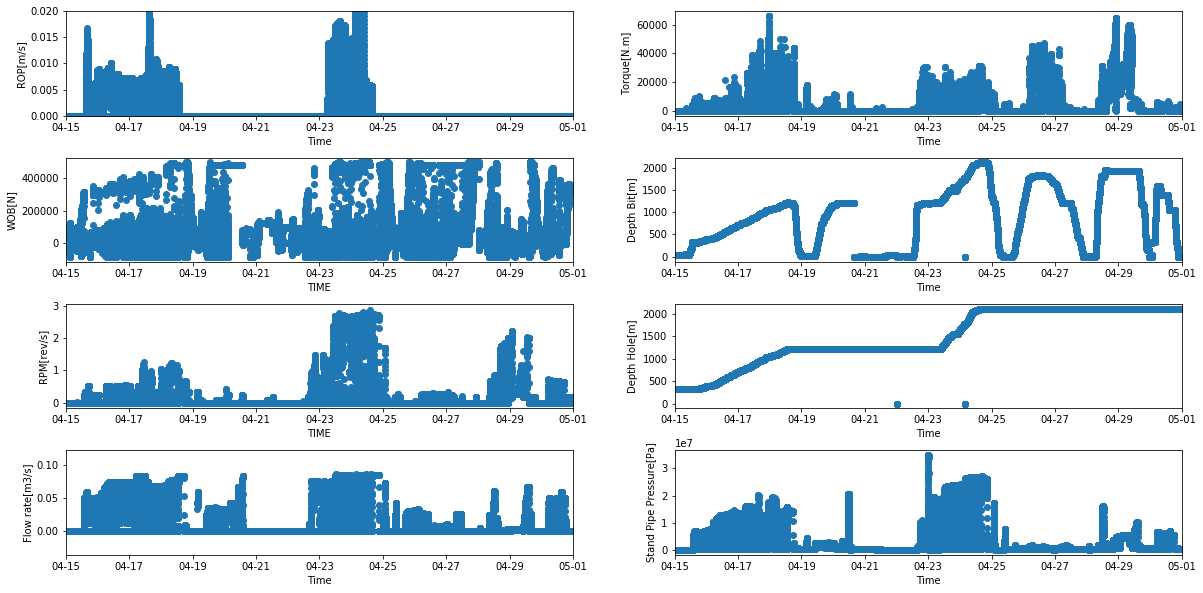

In [30]:
# Plot variables vs time:
df = df_merged
fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'])
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))
ROP_t.set_ylim(0,0.02)

WOB_t.scatter(df['time'],df['WOB[N]'] )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

RPM_t.scatter(df['time'],df['RPM[rev/s]'])
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

TOR_t.scatter(df['time'],df['Torque[N.m]'])
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

DB_t.scatter(df['time'],df['Depth Bit[m]'])
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

DH_t.scatter(df['time'],df['Depth Hole[m]'])
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'])
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 4,15), datetime(2020, 5, 1))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'])
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 4,15), datetime(2020, 5, 1))

plt.show()

In [16]:
# Interpolation:
df = df_merged
df_test = df
df_test['ROP[m/s]'] = df_test['ROP[m/s]'].interpolate()
df_test['WOB[N]'] = df_test['WOB[N]'].interpolate()
df_test['Torque[N.m]'] = df_test['Torque[N.m]'].interpolate()
df_test['RPM[rev/s]'] = df_test['RPM[rev/s]'].interpolate()
df_test['Depth Bit[m]'] = df_test['Depth Bit[m]'].interpolate()
df_test['Flow rate[m3/s]'] = df_test['Flow rate[m3/s]'].interpolate()
df_test['Stand Pipe Pressure[Pa]'] = df_test['Stand Pipe Pressure[Pa]'].interpolate()
df_test

time  Depth Hole[m]  Depth Bit[m]  ROP[m/s]  \
0      2020-04-15 00:00:00+00:00         318.00     34.606612       NaN   
1      2020-04-15 00:00:01+00:00         318.00     34.606600       0.0   
2      2020-04-15 00:00:04+00:00         318.00     34.606600       0.0   
3      2020-04-15 00:00:05+00:00         318.00     34.606600       0.0   
4      2020-04-15 00:00:06+00:00         318.00     34.606600       0.0   
...                          ...            ...           ...       ...   
702007 2020-05-01 20:37:56+00:00        2117.11    407.753000       0.0   
702008 2020-05-01 20:37:58+00:00        2117.11    407.753000       0.0   
702009 2020-05-01 20:38:00+00:00        2117.11    407.752583       0.0   
702010 2020-05-01 20:38:01+00:00        2117.11    407.753000       0.0   
702011 2020-05-01 20:38:04+00:00        2117.11    407.753000       0.0   

        RPM[rev/s]     WOB[N]  Torque[N.m]  Flow rate[m3/s]  \
0              NaN        NaN          NaN              NaN   
1              0.0   88264.40       0.0000              0.0   
2              0.0   88232.90       0.0000              0.0   
3              0.0   88239.45       0.0000              0.0   
4              0.0   88246.00       0.0000              0.0   
...            ...        ...          ...              ...   
702007         0.0  194091.00      80.0610              0.0   
702008         0.0  204639.00      85.3984              0.0   
702009         0.0  204682.50      88.0671              0.0   
702010         0.0  204726.00      90.7358              0.0   
702011         0.0  203367.00     112.0850              0.0   

        Stand Pipe Pressure[Pa]  
0                           NaN  
1                      106772.0  
2                      106624.0  
3                      106647.0  
4                      106670.0  
...                         ...  
702007                 676376.0  
702008                 675140.0  
702009                 674807.5  
702010                 674475.0  
702011                 674436.0  

[702012 rows x 9 columns]

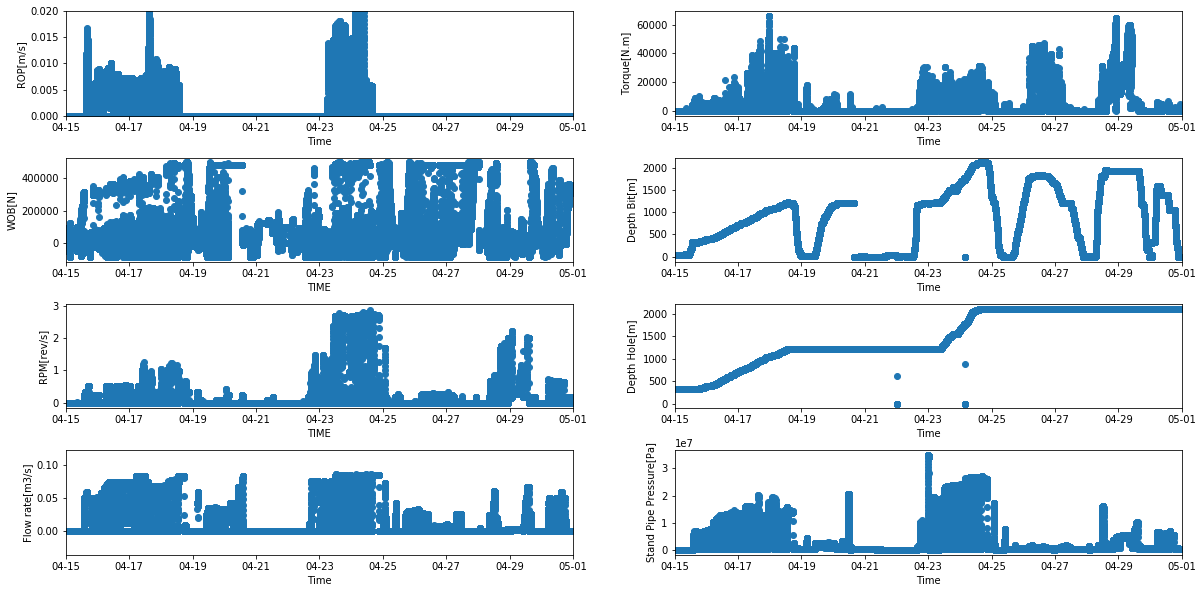

In [33]:
# Plot variables vs time after interpolation:
df = df_test
fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'])
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))
ROP_t.set_ylim(0,0.02)

WOB_t.scatter(df['time'],df['WOB[N]'] )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

RPM_t.scatter(df['time'],df['RPM[rev/s]'])
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

TOR_t.scatter(df['time'],df['Torque[N.m]'])
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

DB_t.scatter(df['time'],df['Depth Bit[m]'])
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

DH_t.scatter(df['time'],df['Depth Hole[m]'])
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'])
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 4,15), datetime(2020, 5, 1))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'])
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 4,15), datetime(2020, 5, 1))

plt.show()

In [17]:
# Delete rows when ROP is 0
df = df_test
df = df[df['ROP[m/s]']>0]
df

time  Depth Hole[m]  Depth Bit[m]  ROP[m/s]  \
26158  2020-04-15 14:57:35+00:00     318.000000    311.474500  0.000108   
26159  2020-04-15 14:57:36+00:00     318.000000    311.476000  0.000216   
26160  2020-04-15 14:57:39+00:00     318.000000    311.472000  0.000144   
26161  2020-04-15 14:57:40+00:00     318.000000    311.473288  0.000176   
26162  2020-04-15 14:57:42+00:00     318.000000    311.476000  0.000209   
...                          ...            ...           ...       ...   
404680 2020-04-24 15:56:04+00:00    2117.105142   2117.030000  0.000583   
404681 2020-04-24 15:56:05+00:00    2117.105142   2117.025000  0.000583   
404682 2020-04-24 15:56:06+00:00    2117.105142   2117.020000  0.000583   
404683 2020-04-24 15:56:09+00:00    2117.105142   2117.000000  0.000583   
404684 2020-04-24 15:56:10+00:00    2117.105142   2116.989499  0.000292   

        RPM[rev/s]     WOB[N]  Torque[N.m]  Flow rate[m3/s]  \
26158     0.325272  37052.100     3413.265         0.049421   
26159     0.324190  35457.600     3976.360         0.049439   
26160     0.328735  30266.200     2006.860         0.049457   
26161     0.328302  34769.750     2441.860         0.049457   
26162     0.327869  39273.300     2876.860         0.049457   
...            ...        ...          ...              ...   
404680    2.656930  13615.000    15702.600         0.084259   
404681    2.656715  11507.705    15627.900         0.084312   
404682    2.656500   9400.410    15553.200         0.084365   
404683    2.656710    688.096    15030.100         0.083922   
404684    2.656710  -3793.767    15051.450         0.084028   

        Stand Pipe Pressure[Pa]  
26158                 5459965.0  
26159                 5405870.0  
26160                 5153860.0  
26161                 5158850.0  
26162                 5163840.0  
...                         ...  
404680               26520100.0  
404681               26552150.0  
404682               26584200.0  
404683               26391200.0  
404684               26420100.0  

[124984 rows x 9 columns]

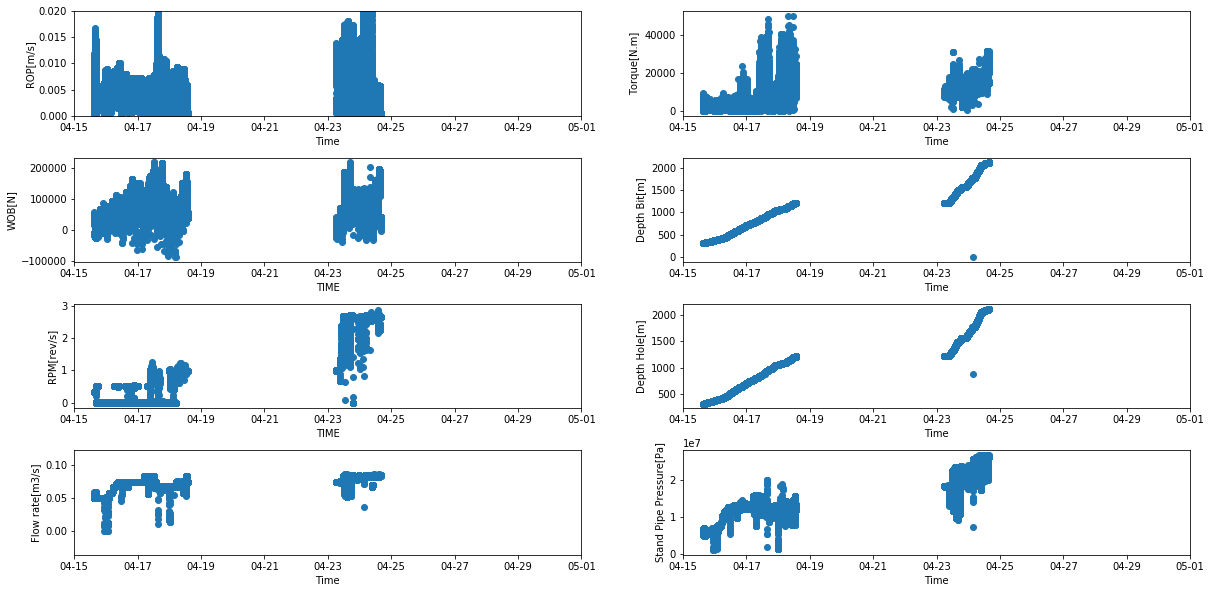

In [36]:
# Plot variables vs time after interpolation:

fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'])
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))
ROP_t.set_ylim(0,0.02)

WOB_t.scatter(df['time'],df['WOB[N]'] )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

RPM_t.scatter(df['time'],df['RPM[rev/s]'])
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

TOR_t.scatter(df['time'],df['Torque[N.m]'])
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

DB_t.scatter(df['time'],df['Depth Bit[m]'])
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

DH_t.scatter(df['time'],df['Depth Hole[m]'])
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'])
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 4,15), datetime(2020, 5, 1))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'])
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 4,15), datetime(2020, 5, 1))
plt.show()

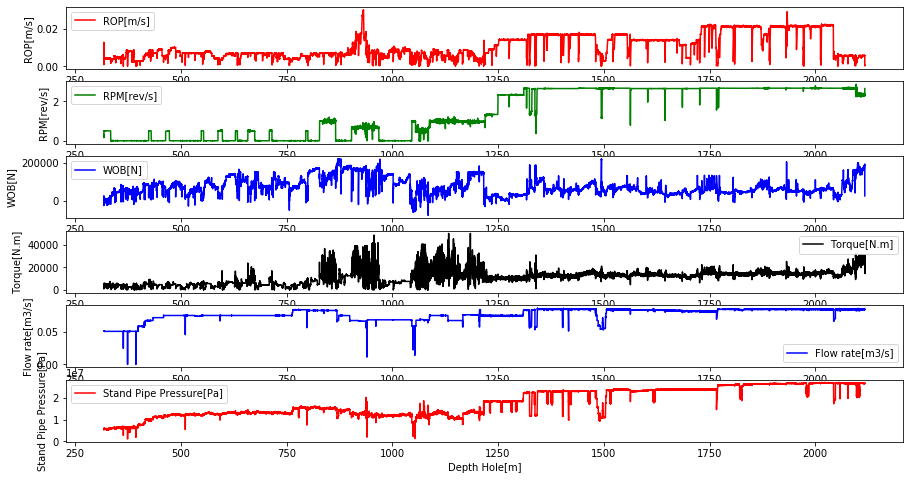

In [18]:
# Plot data vs depth (since the relationship is almost lineal) after interpolation:

fig,axis =plt.subplots(nrows =6, figsize =(15,8)) 
sns.lineplot(df['Depth Hole[m]'] , df['ROP[m/s]'], ax = axis[0], label ="ROP[m/s]",color ='red', ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['RPM[rev/s]'], ax = axis[1], label ="RPM[rev/s]", color ='green',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['WOB[N]'], ax = axis[2], label ="WOB[N]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Torque[N.m]'], ax = axis[3], label ="Torque[N.m]", color ='black',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Flow rate[m3/s]'], ax = axis[4], label ="Flow rate[m3/s]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Stand Pipe Pressure[Pa]'], ax = axis[5], label ="Stand Pipe Pressure[Pa]", color ='red',ci = None)
plt.show()

In [19]:
# Removing outliers

Q1_ROP = df['ROP[m/s]'].quantile(0.25)
Q3_ROP = df['ROP[m/s]'].quantile(0.90)
IQR_ROP = Q3_ROP - Q1_ROP

Q1_RPM = df['RPM[rev/s]'].quantile(0.25)
Q3_RPM = df['RPM[rev/s]'].quantile(0.75)
IQR_RPM = Q3_RPM - Q1_RPM

Q1_TOR = df['Torque[N.m]'].quantile(0.25)
Q3_TOR= df['Torque[N.m]'].quantile(0.75)
IQR_TOR = Q3_TOR - Q1_TOR


Q1_WOB = df['WOB[N]'].quantile(0.25)
Q3_WOB = df['WOB[N]'].quantile(0.75)
IQR_WOB = Q3_WOB - Q1_WOB

Q1_SPP = df['Stand Pipe Pressure[Pa]'].quantile(0.25)
Q3_SPP = df['Stand Pipe Pressure[Pa]'].quantile(0.75)
IQR_SPP = Q3_SPP - Q1_SPP

Q1_FR = df['Flow rate[m3/s]'].quantile(0.25)
Q3_FR= df['Flow rate[m3/s]'].quantile(0.75)
IQR_FR = Q3_FR - Q1_FR


df_test_out = df.query('(@Q1_ROP-1.5*@IQR_ROP)<=`ROP[m/s]`<=(@Q3_ROP+1.5*@IQR_ROP)')
# df_test_out = df[(Q1_ROP-1.5*IQR_ROP)<=df['ROP[m/s]']]
# df_test_out = df[df['ROP[m/s]']<=(Q3_ROP+1.5*IQR_ROP)]

df_test_out = df.query('(@Q1_RPM-1.5*@IQR_RPM)<=`RPM[rev/s]`<=(@Q3_RPM+1.5*@IQR_RPM)')
# df_test_out = df[(Q1_RPM-1.5*IQR_RPM)<=df['RPM[rev/s]']]
# df_test_out = df[df['RPM[rev/s]']<=(Q3_RPM+1.5*IQR_RPM)]

df_test_out = df.query('(@Q1_TOR-1.5*@IQR_TOR)<=`Torque[N.m]`<=(@Q3_TOR+1.5*@IQR_TOR)')
# df_test_out = df[(Q1_TOR-1.5*IQR_TOR)<=df['Torque[N.m]']]
# df_test_out = df[df['Torque[N.m]']<=(Q3_TOR+1.5*IQR_TOR)]
df_test_out = df.query('(@Q1_WOB-1.5*@IQR_WOB)<=`WOB[N]`<=(@Q3_WOB+1.5*@IQR_WOB)')
# df_test_out = df[(Q1_WOB-1.5*IQR_WOB)<=df['WOB[N]']]
# df_test_out = df[df['WOB[N]']<=(Q3_WOB+1.5*IQR_WOB)]
df_test_out = df.query('(@Q1_SPP-1.5*@IQR_SPP)<=`Stand Pipe Pressure[Pa]`<=(@Q3_SPP+1.5*@IQR_SPP)')
# df_test_out = df[(Q1_SPP-1.5*IQR_SPP)<=df['Stand Pipe Pressure[Pa]']]
# df_test_out = df[df['Stand Pipe Pressure[Pa]']<=(Q3_SPP+1.5*IQR_SPP)]
df_test_out = df.query('(@Q1_FR-1.5*@IQR_FR)<=`Flow rate[m3/s]`<=(@Q3_FR+1.5*@IQR_FR)')
# df_test_out = df[(Q1_FR-1.5*IQR_FR)<=df['Flow rate[m3/s]']]
# df_test_out = df[df['Flow rate[m3/s]']<=(Q3_FR+1.5*IQR_FR)]

df_test_out

time  Depth Hole[m]  Depth Bit[m]  ROP[m/s]  \
26158  2020-04-15 14:57:35+00:00     318.000000    311.474500  0.000108   
26159  2020-04-15 14:57:36+00:00     318.000000    311.476000  0.000216   
26160  2020-04-15 14:57:39+00:00     318.000000    311.472000  0.000144   
26161  2020-04-15 14:57:40+00:00     318.000000    311.473288  0.000176   
26162  2020-04-15 14:57:42+00:00     318.000000    311.476000  0.000209   
...                          ...            ...           ...       ...   
404680 2020-04-24 15:56:04+00:00    2117.105142   2117.030000  0.000583   
404681 2020-04-24 15:56:05+00:00    2117.105142   2117.025000  0.000583   
404682 2020-04-24 15:56:06+00:00    2117.105142   2117.020000  0.000583   
404683 2020-04-24 15:56:09+00:00    2117.105142   2117.000000  0.000583   
404684 2020-04-24 15:56:10+00:00    2117.105142   2116.989499  0.000292   

        RPM[rev/s]     WOB[N]  Torque[N.m]  Flow rate[m3/s]  \
26158     0.325272  37052.100     3413.265         0.049421   
26159     0.324190  35457.600     3976.360         0.049439   
26160     0.328735  30266.200     2006.860         0.049457   
26161     0.328302  34769.750     2441.860         0.049457   
26162     0.327869  39273.300     2876.860         0.049457   
...            ...        ...          ...              ...   
404680    2.656930  13615.000    15702.600         0.084259   
404681    2.656715  11507.705    15627.900         0.084312   
404682    2.656500   9400.410    15553.200         0.084365   
404683    2.656710    688.096    15030.100         0.083922   
404684    2.656710  -3793.767    15051.450         0.084028   

        Stand Pipe Pressure[Pa]  
26158                 5459965.0  
26159                 5405870.0  
26160                 5153860.0  
26161                 5158850.0  
26162                 5163840.0  
...                         ...  
404680               26520100.0  
404681               26552150.0  
404682               26584200.0  
404683               26391200.0  
404684               26420100.0  

[124874 rows x 9 columns]

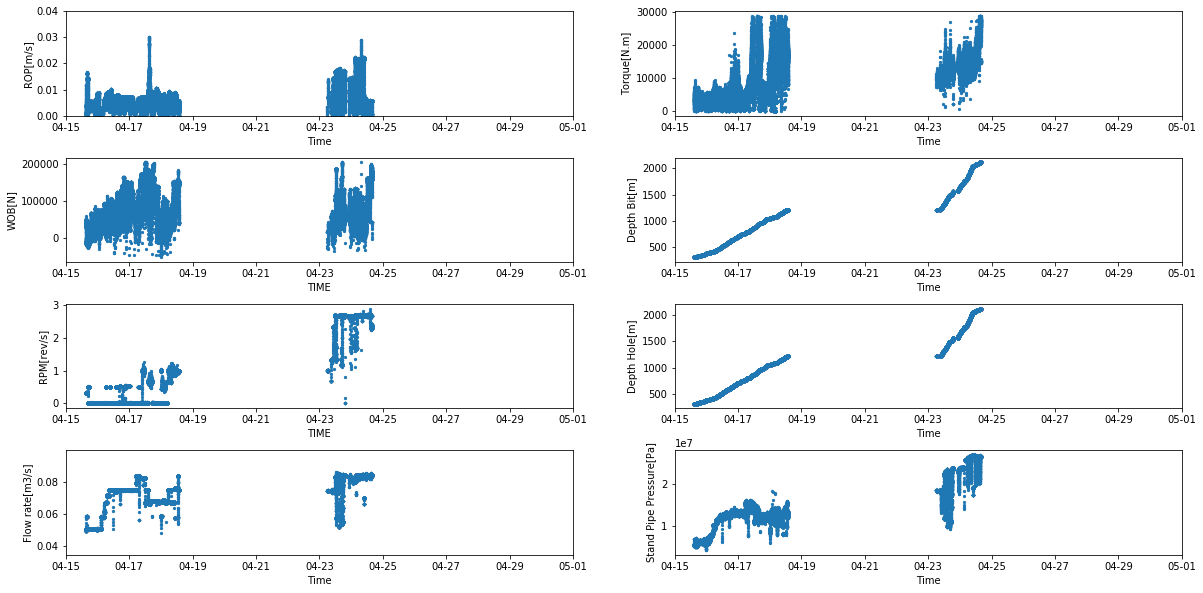

In [39]:
# Plot variables vs time after removing outliers:

fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'], s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))
ROP_t.set_ylim(0,0.04)

WOB_t.scatter(df['time'],df['WOB[N]'], s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

RPM_t.scatter(df['time'],df['RPM[rev/s]'], s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

TOR_t.scatter(df['time'],df['Torque[N.m]'], s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

DB_t.scatter(df['time'],df['Depth Bit[m]'], s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

DH_t.scatter(df['time'],df['Depth Hole[m]'], s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'], s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 4,15), datetime(2020, 5, 1))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'], s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 4,15), datetime(2020, 5, 1))

plt.show()

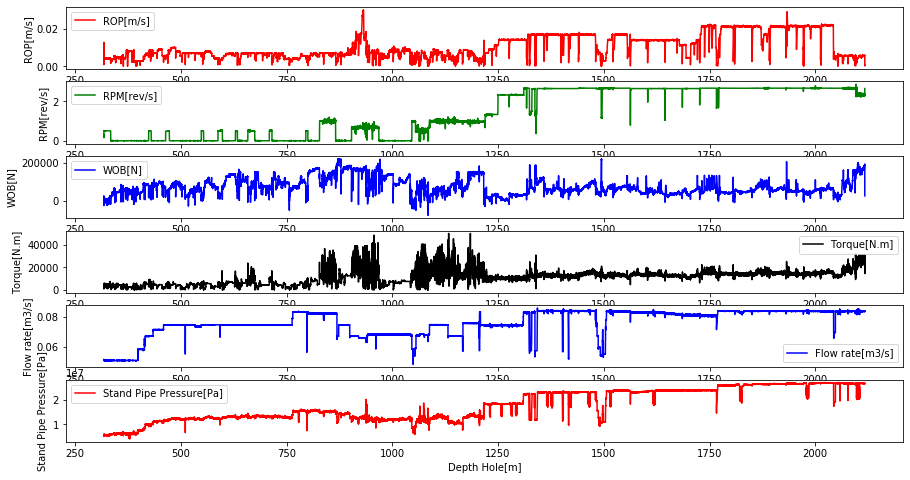

In [20]:
# Plot data vs depth (since the relationship is almost lineal) after removing outliers:
df = df_test_out
fig,axis =plt.subplots(nrows =6, figsize =(15,8)) 
sns.lineplot(df['Depth Hole[m]'] , df['ROP[m/s]'], ax = axis[0], label ="ROP[m/s]",color ='red', ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['RPM[rev/s]'], ax = axis[1], label ="RPM[rev/s]", color ='green',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['WOB[N]'], ax = axis[2], label ="WOB[N]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Torque[N.m]'], ax = axis[3], label ="Torque[N.m]", color ='black',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Flow rate[m3/s]'], ax = axis[4], label ="Flow rate[m3/s]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Stand Pipe Pressure[Pa]'], ax = axis[5], label ="Stand Pipe Pressure[Pa]", color ='red',ci = None)

plt.show()

In [21]:
# Noise reduction (window = 30):

df_test2 = df
df_test2['ROP[m/s]'] = df['ROP[m/s]'].rolling(window = 30, center=True).mean()
df_test2['RPM[rev/s]'] = df['RPM[rev/s]'].rolling(window = 30, center=True).mean()
df_test2['WOB[N]'] = df['WOB[N]'].rolling(window = 30, center=True).mean()
df_test2['Torque[N.m]'] = df['Torque[N.m]'].rolling(window = 30, center=True).mean()
df_test2['Flow rate[m3/s]'] = df['Flow rate[m3/s]'].rolling(window = 30, center=True).mean()
df_test2['Stand Pipe Pressure[Pa]'] = df['Stand Pipe Pressure[Pa]'].rolling(window = 30, center=True).mean()
df_test2.dropna(inplace = True)

# Noise reduction (window = 40):
df_test4 = df
df_test4['ROP[m/s]'] = df['ROP[m/s]'].rolling(window = 40, center=True).mean()
df_test4['RPM[rev/s]'] = df['RPM[rev/s]'].rolling(window = 40, center=True).mean()
df_test4['WOB[N]'] = df['WOB[N]'].rolling(window = 40, center=True).mean()
df_test4['Torque[N.m]'] = df['Torque[N.m]'].rolling(window = 40, center=True).mean()
df_test4['Flow rate[m3/s]'] = df['Flow rate[m3/s]'].rolling(window = 40, center=True).mean()
df_test4['Stand Pipe Pressure[Pa]'] = df['Stand Pipe Pressure[Pa]'].rolling(window = 40, center=True).mean()
df_test4.dropna(inplace = True)

# Noise reduction (window = 70):
df_test5 = df
df_test5['ROP[m/s]'] = df['ROP[m/s]'].rolling(window = 40, center=True).mean()
df_test5['RPM[rev/s]'] = df['RPM[rev/s]'].rolling(window = 40, center=True).mean()
df_test5['WOB[N]'] = df['WOB[N]'].rolling(window = 40, center=True).mean()
df_test5['Torque[N.m]'] = df['Torque[N.m]'].rolling(window = 40, center=True).mean()
df_test5['Flow rate[m3/s]'] = df['Flow rate[m3/s]'].rolling(window = 70, center=True).mean()
df_test5['Stand Pipe Pressure[Pa]'] = df['Stand Pipe Pressure[Pa]'].rolling(window = 70, center=True).mean()
df_test5.dropna(inplace = True)

# Noise reduction (window = 20):
df_test3 = df
df_test3['ROP[m/s]'] = df['ROP[m/s]'].rolling(window = 20, center=True).mean()
df_test3['RPM[rev/s]'] = df['RPM[rev/s]'].rolling(window = 20, center=True).mean()
df_test3['WOB[N]'] = df['WOB[N]'].rolling(window = 20, center=True).mean()
df_test3['Torque[N.m]'] = df['Torque[N.m]'].rolling(window = 20, center=True).mean()
df_test3['Flow rate[m3/s]'] = df['Flow rate[m3/s]'].rolling(window = 20, center=True).mean()
df_test3['Stand Pipe Pressure[Pa]'] = df['Stand Pipe Pressure[Pa]'].rolling(window = 20, center=True).mean()
df_test3.dropna(inplace = True)
df_test2

C:\Users\renan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\renan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\renan\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

time  Depth Hole[m]  Depth Bit[m]  ROP[m/s]  \
26238  2020-04-15 15:00:18+00:00     318.000000    311.505000  0.000194   
26239  2020-04-15 15:00:20+00:00     318.000000    311.508147  0.000196   
26240  2020-04-15 15:00:21+00:00     318.000000    311.509000  0.000197   
26241  2020-04-15 15:00:24+00:00     318.000000    311.507000  0.000199   
26242  2020-04-15 15:00:25+00:00     318.000000    311.509000  0.000200   
...                          ...            ...           ...       ...   
404193 2020-04-24 15:39:20+00:00    2116.850934   2116.850934  0.005400   
404194 2020-04-24 15:39:21+00:00    2116.857103   2116.860000  0.005375   
404195 2020-04-24 15:39:24+00:00    2116.874646   2116.870000  0.005347   
404196 2020-04-24 15:39:25+00:00    2116.880819   2116.880000  0.005317   
404197 2020-04-24 15:39:27+00:00    2116.892015   2116.890000  0.005285   

        RPM[rev/s]         WOB[N]   Torque[N.m]  Flow rate[m3/s]  \
26238     0.324848   34868.184457   3833.189270         0.049507   
26239     0.324853   34861.285143   3829.806422         0.049516   
26240     0.324859   34852.264645   3826.419277         0.049527   
26241     0.324864   34840.632908   3823.043144         0.049539   
26242     0.324870   34825.886196   3819.688590         0.049552   
...            ...            ...           ...              ...   
404193    2.339910  182451.462372  27196.775244         0.084187   
404194    2.340168  182180.983542  27173.408058         0.084187   
404195    2.340433  181866.259444  27146.111218         0.084187   
404196    2.340707  181505.468637  27114.716234         0.084187   
404197    2.340993  181096.811865  27079.062683         0.084187   

        Stand Pipe Pressure[Pa]  
26238              5.334439e+06  
26239              5.335382e+06  
26240              5.336493e+06  
26241              5.337777e+06  
26242              5.339239e+06  
...                         ...  
404193             2.655913e+07  
404194             2.655869e+07  
404195             2.655821e+07  
404196             2.655772e+07  
404197             2.655719e+07  

[124718 rows x 9 columns]

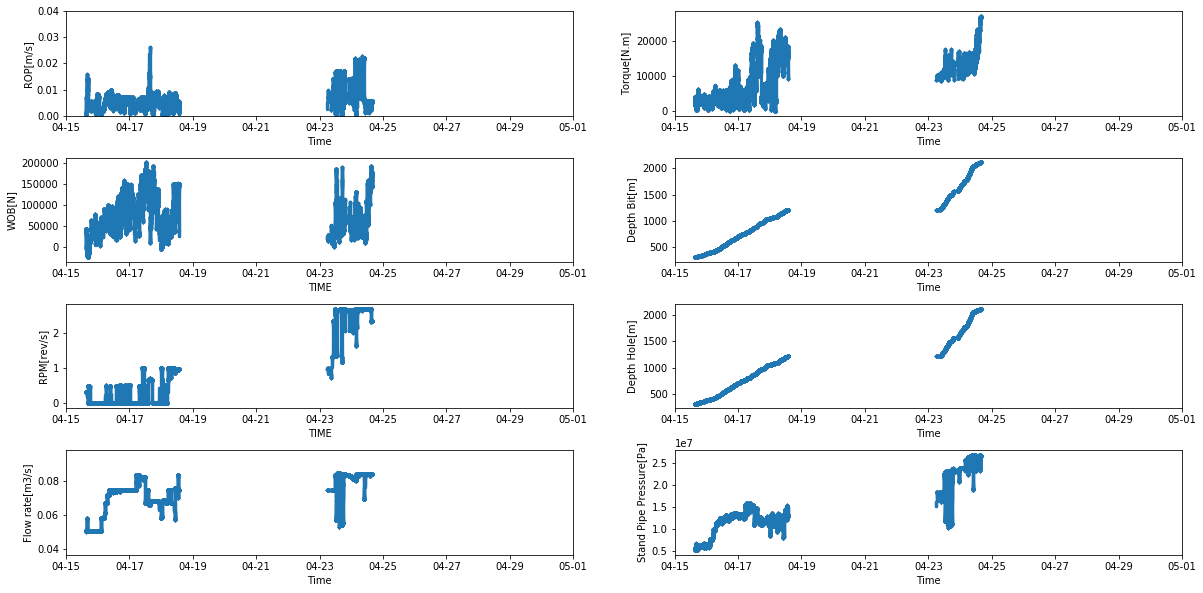

In [42]:
# Plot variables vs time after removing NOISE:
df = df_test2
fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'], s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))
ROP_t.set_ylim(0,0.04)

WOB_t.scatter(df['time'],df['WOB[N]'], s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

RPM_t.scatter(df['time'],df['RPM[rev/s]'], s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

TOR_t.scatter(df['time'],df['Torque[N.m]'], s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

DB_t.scatter(df['time'],df['Depth Bit[m]'], s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

DH_t.scatter(df['time'],df['Depth Hole[m]'], s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'], s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 4,15), datetime(2020, 5, 1))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'], s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 4,15), datetime(2020, 5, 1))

plt.show()

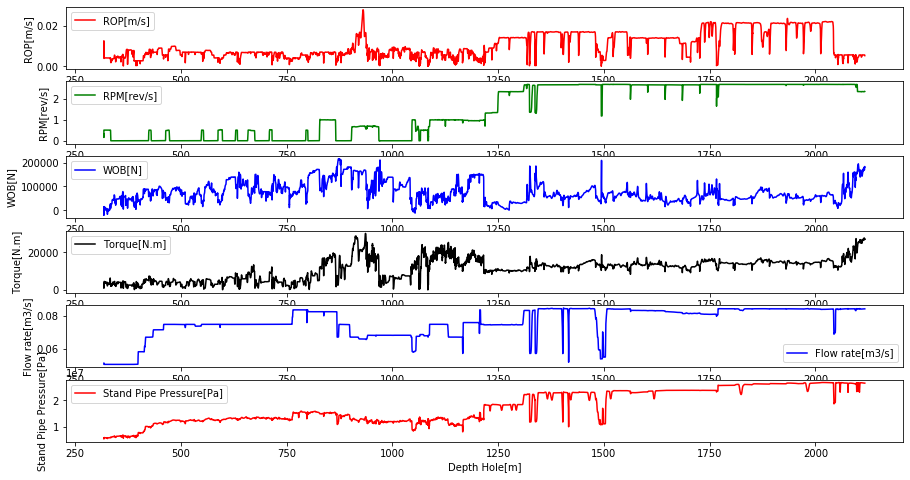

In [22]:
# Plot data vs depth (since the relationship is almost lineal) after removing NOISE(window 30):
df = df_test2
fig,axis =plt.subplots(nrows =6, figsize =(15,8)) 
sns.lineplot(df['Depth Hole[m]'] , df['ROP[m/s]'], ax = axis[0], label ="ROP[m/s]",color ='red', ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['RPM[rev/s]'], ax = axis[1], label ="RPM[rev/s]", color ='green',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['WOB[N]'], ax = axis[2], label ="WOB[N]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Torque[N.m]'], ax = axis[3], label ="Torque[N.m]", color ='black',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Flow rate[m3/s]'], ax = axis[4], label ="Flow rate[m3/s]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Stand Pipe Pressure[Pa]'], ax = axis[5], label ="Stand Pipe Pressure[Pa]", color ='red',ci = None)

plt.show()

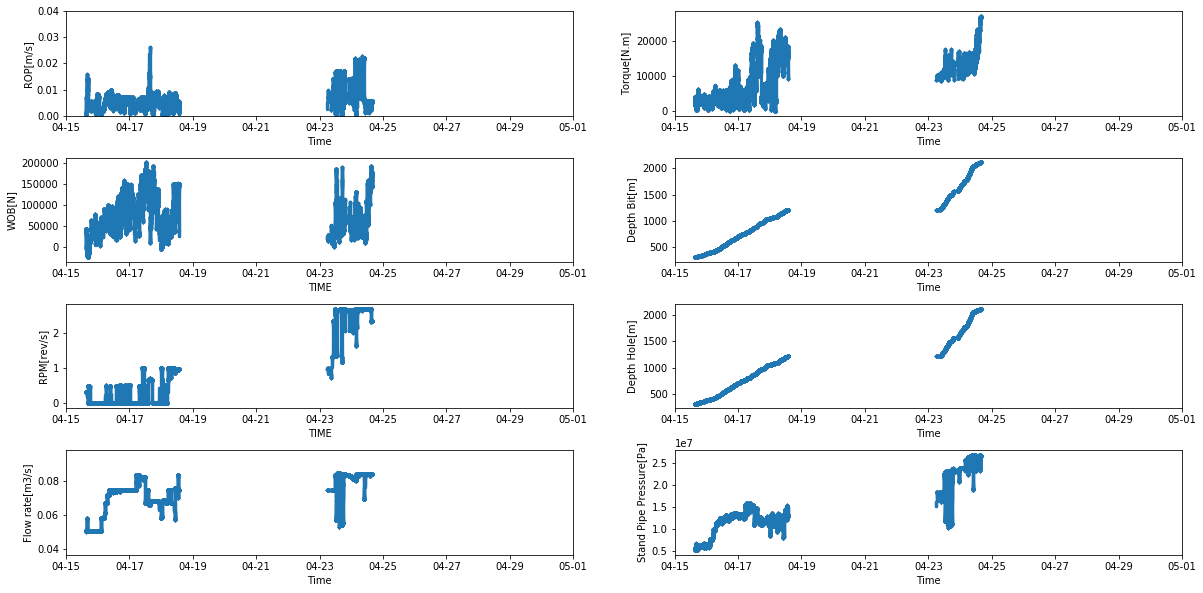

In [44]:
# Plot variables vs time after removing NOISE (window 70):
df = df_test5
fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'], s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))
ROP_t.set_ylim(0,0.04)

WOB_t.scatter(df['time'],df['WOB[N]'], s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

RPM_t.scatter(df['time'],df['RPM[rev/s]'], s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

TOR_t.scatter(df['time'],df['Torque[N.m]'], s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

DB_t.scatter(df['time'],df['Depth Bit[m]'], s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

DH_t.scatter(df['time'],df['Depth Hole[m]'], s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 4, 15), datetime(2020, 5, 1))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'], s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 4,15), datetime(2020, 5, 1))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'], s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 4,15), datetime(2020, 5, 1))

plt.show()

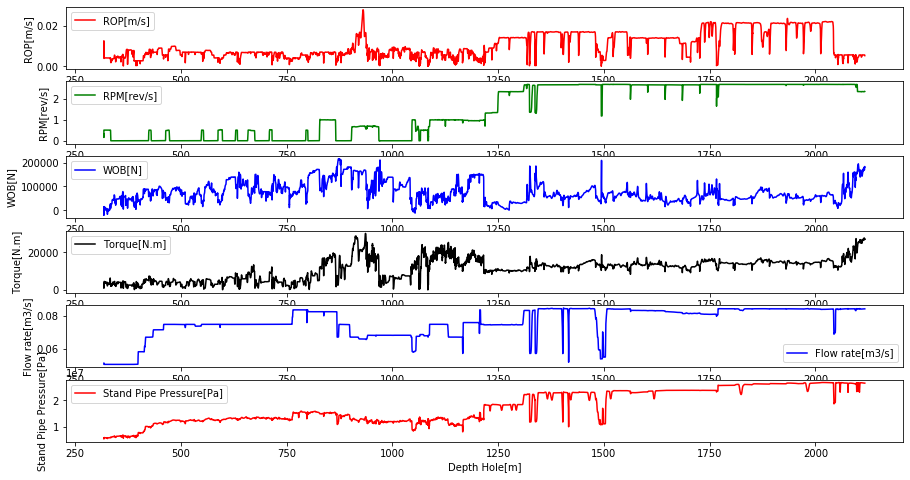

In [23]:
# Plot data vs depth (since the relationship is almost lineal) after removing NOISE(window 70):
df = df_test5
fig,axis =plt.subplots(nrows =6, figsize =(15,8)) 
sns.lineplot(df['Depth Hole[m]'] , df['ROP[m/s]'], ax = axis[0], label ="ROP[m/s]",color ='red', ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['RPM[rev/s]'], ax = axis[1], label ="RPM[rev/s]", color ='green',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['WOB[N]'], ax = axis[2], label ="WOB[N]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Torque[N.m]'], ax = axis[3], label ="Torque[N.m]", color ='black',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Flow rate[m3/s]'], ax = axis[4], label ="Flow rate[m3/s]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Stand Pipe Pressure[Pa]'], ax = axis[5], label ="Stand Pipe Pressure[Pa]", color ='red',ci = None)

plt.show()

In [24]:
# Create new csv file with data cleaned
df = df_test2

df.to_csv(r'Cleaned wells/NO162D20-6.csv', index = False, header=True)